In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
origin_city_data = pd.read_csv("raw_data/city_data.csv")
ride_data = pd.read_csv("raw_data/ride_data.csv")

In [3]:
origin_city_data.head()
# set city as index
# city_data_as_index = origin_city_data.set_index('city')

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
# groupby city
groupby_city = origin_city_data.groupby('city')
city_data = groupby_city.sum()
# drop the duplicate cities from the original dataset
dropped_duplicates_mask = origin_city_data['city'].duplicated(keep='first')
dropped_duplicates_df = origin_city_data[~dropped_duplicates_mask]
dx = dropped_duplicates_df.set_index('city')
# add city type to the df
city_data['type'] = dx['type']
# reset the index
new_city_data = city_data.reset_index()
new_city_data_city_as_index = new_city_data.set_index('city')

In [5]:
# Merge the two datasets by city
merged_df = ride_data.merge(new_city_data, on='city', how='outer')
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [6]:
group_by_city = merged_df.groupby('city')

# average fare/city
average_fare=group_by_city['fare'].mean()

# total rides/city
total_rides_per_city = group_by_city['ride_id'].count()

# total drivers/city
total_drivers_per_city = new_city_data_city_as_index['driver_count']

# city types
city_types = new_city_data_city_as_index['type']

# pyber_analysis
pyber_analysis_df = pd.DataFrame()
pyber_analysis_df['Total Number of Drivers Per City'] = total_drivers_per_city
pyber_analysis_df['Average Fare']= average_fare
pyber_analysis_df['Total Number of Rides Per City'] = total_rides_per_city
pyber_analysis_df['City Types'] = city_types

# display
pyber_analysis_df.head()

,Total Number of Drivers Per City,Average Fare,Total Number of Rides Per City,City Types
city,,,,
Alvarezhaven,21,23.928710,31,Urban
Alyssaberg,67,20.609615,26,Urban
Anitamouth,16,37.315556,9,Suburban
Antoniomouth,21,23.625000,22,Urban
Aprilchester,49,21.981579,19,Urban


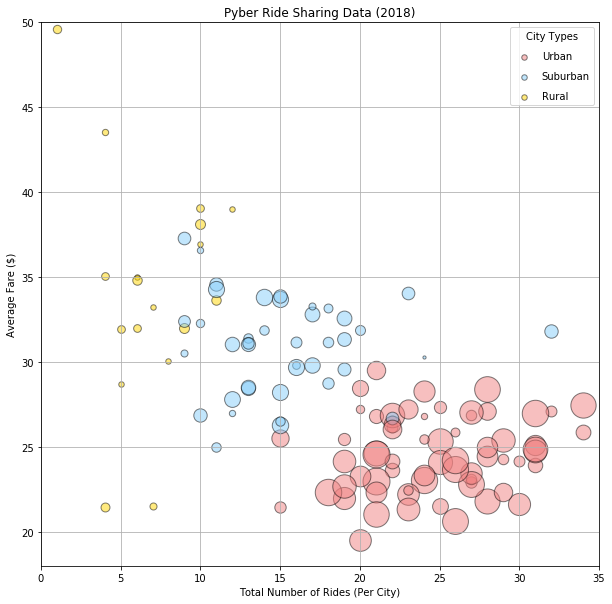

In [40]:
# bubble plot
# Gold, Light Sky Blue, and Light Coral
colors = {'Urban':'lightcoral',
          'Suburban':'lightskyblue',
          'Rural':'gold'}
plt.figure(figsize=(10,10))

plt.xlim(0, 35)
plt.ylim(18, 50)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")


for i, r in pyber_analysis_df.iterrows():
    plt.scatter( x=r['Total Number of Rides Per City'], 
                y=r['Average Fare'], 
                s=r['Total Number of Drivers Per City']*10,
                marker='o', 
                facecolors=colors.get(r['City Types']),
                edgecolors='black',
                alpha=0.5,
                linewidths= 1
                )
# Here we create a legend by ploting empty lists with the desired size and label
for city_type, color in colors.items():
    plt.scatter([],[], c=color, edgecolors='black', alpha=0.5, s=30, linewidths=1,label=city_type) 
plt.legend(scatterpoints=1, labelspacing=1, title='City Types')  

plt.grid(True)
plt.savefig("bubble.png")
plt.show()

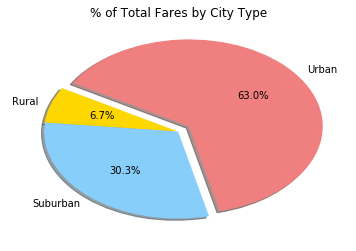

In [56]:
group_by_city_type = merged_df.groupby('type')
# % of the total fare by city type
total_fare_by_city = group_by_city_type['fare'].sum()
total_fare = total_fare_by_city.sum()
total_fare_percent_by_city = total_fare_by_city/total_fare * 100.0
# plot the pie chart for the percent of total fares by city type 
pie_city_types = total_fare_percent_by_city.index
pie_percents = total_fare_percent_by_city.values
colors_list = [colors.get(city_type) for city_type in pie_city_types]
explode = (0,0,0.1)
plt.pie(pie_percents, explode=explode, labels=pie_city_types, colors=colors_list, autopct="%1.1f%%", 
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
plt.show()

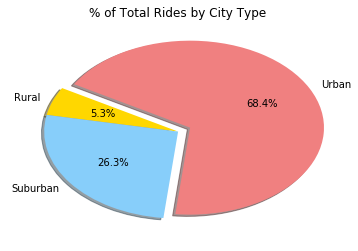

In [57]:
# % of Total Rides by City Type
total_rides_by_city = group_by_city_type.count()['ride_id']
total_rides = total_rides_by_city.sum()
total_ride_percents_by_city = total_rides_by_city / total_rides * 100.0

# plot the chart for the percent of total rides by city type
# plot the pie chart 
pie_city_types = total_ride_percents_by_city.index
pie_percents = total_ride_percents_by_city.values
colors_list = [colors.get(city_type) for city_type in pie_city_types]
explode = (0,0,0.1)
plt.pie(pie_percents, explode=explode, labels=pie_city_types, colors=colors_list, autopct="%1.1f%%", 
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
plt.show()

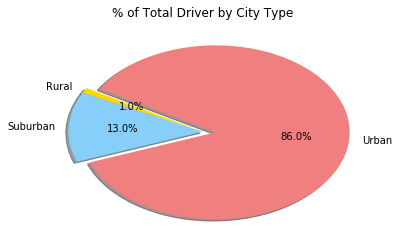

In [58]:
# % of Total Drivers by City Type
total_drivers_by_city = group_by_city_type['driver_count'].sum()
total_drivers = total_drivers_by_city.sum()
total_driver_percents_by_city = total_drivers_by_city/total_drivers * 100.0

# plot the pie chart for the percent of total drivers by city type
pie_city_types = total_driver_percents_by_city.index
pie_percents = total_driver_percents_by_city.values
colors_list = [colors.get(city_type) for city_type in pie_city_types]
explode = (0,0,0.1)
plt.pie(pie_percents, explode=explode, labels=pie_city_types, colors=colors_list, autopct="%1.1f%%", 
        shadow=True, startangle=150)
plt.title("% of Total Driver by City Type")
plt.show()